# Sound Wave 🎵
In this Notebook, we will see how we can plot the sound wave equation and how we can change the characteristics of the wave and sound interactively using ***Ipywidgets*** along with other libraries such as NumPy and Matplotlib.

## 1. Import Libraries
To use certain functions, we first need to import the libraries (or collection of functions) that contain those functions.

🚨 **Important**: To run the code, like the one in the cell below this text, click on the cell with your mouse and then press the "**▶ Run**" button that you will see in the menu above, or you can also press the **shift** key (holding it down) **+ enter** on your keyboard.

In [1]:
import numpy as np  # Math functions and array handling
import matplotlib.pyplot as plt  # Plotting graphs
from ipywidgets import interact  # Interactive widgets
from IPython.display import display, Audio  # Multimedia display (audio)
from util.sound_wave import sound_wave_ref, sound_wave_blind  # Import sound waves

## 2. Define the Equation of a Sound Wave
<left><img src="images/Standing_wave.gif" width="400px">

A sound wave can be represented by a **sine curve** defined by the parameters: **amplitude, phase, and frequency**. For this, we use the following equation:

$y(x) = A \sin( 2 \pi (\nu x + \phi ))$

where

$A = amplitude$

$\phi = phase$

$\nu = frequency$

In the cell below, we will create:
- three variables to define the amplitude, phase, and frequency: ***amp, phase, frec***
- a vector (or array) to define the points where the curve equation will be calculated: ***x***
- the curve equation (as a function of *x*): ***y***

We will use some of the functions included in the **Numpy** library, specifically:
- **arange**: to generate a vector of values from 0 to 1 in intervals of 0.01
- **pi**: to get the value of pi.
- **sin**: sine function

⚡ **Exercise:** Create a function called `sound_wave` according to the info above.

In [2]:
def sound_wave(x,amp,phase,frec):
    y = amp * np.sin(2 * np.pi * (frec * x + phase))
    return y

⚡ **Exercise:** Now plot the sound wave values (y axis) that results of applying the following parameter values (x axis values range from 0 to 1 in intervals of 0.01):

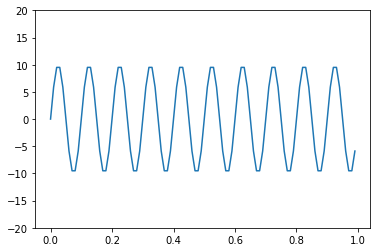

In [3]:
amp = 10
phase = 0 
frec = 10 

x = np.arange(0, 1, 0.01) # vector of values from 0 to 1 in intervals of 0.01

y = sound_wave(x,amp,phase,frec)

plt.plot(x,y)
plt.ylim(-20,20) # to set the limits of the y-axis, in this case -20 and 20
plt.show()

### Exercise 1
We have defined a reference sound wave that we will import and plot (black curve).

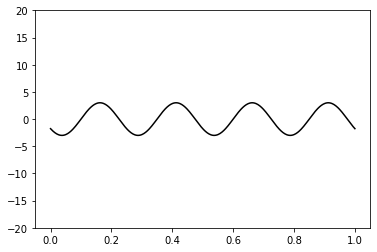

In [4]:
x_ref, y_ref = sound_wave_ref() # assign the x and y values of the reference wave to the variables x_ref and y_ref respectively

# Plot the reference sound wave
plt.plot(x_ref,y_ref, color = 'black') # to plot the reference wave (in black)
plt.ylim(-20, 20)
plt.show()

In the next cell, write down the code so you can paly with the values of amplitude, phase, and frequency to try to adjust the simulated curve obtained with the  `sound_wave` model as closely as possible to the black reference curve. Remember to run the cell after changing the values so that you can visualize the changes.

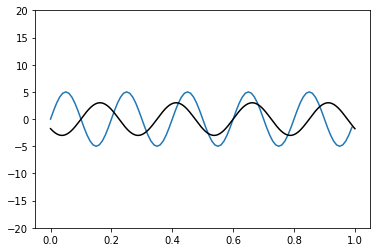

In [5]:
amp = 5 # amplitude
phase = 0 # phase
frec = 5 # frequency

y = sound_wave(x,amp,phase,frec) # y-axis values of the curve with the new parameters (x doesn't change)

# Plot the sound waves
plt.plot(x,y)
plt.plot(x_ref,y_ref, color = 'black') # to plot the reference wave (in black)
plt.ylim(-20, 20)
plt.show()

### Exercise 2:
Now try the same thing but using sliders.

In [6]:
# First, define the parameters we want to modify interactively (p1, p2, p3)
# and the range of possible values, for example: (1,1,0.1) = values between 1 and 1 in intervals of 0.1
@interact(p1 = (0.1, 1, 0.1), p2 = (0.1, 1, 0.05), p3 = (0.1, 1, 0.01))
def interactive_wave(p1 = 0.1, p2 = 0.1, p3 = 0.1):
    x,y = sound_wave_blind(p1,p2,p3)
    plt.plot(x, y)
    plt.plot(x_ref, y_ref, color = 'black')
    plt.ylim((-20, 20))
    plt.show()

interactive(children=(FloatSlider(value=0.1, description='p1', max=1.0, min=0.1), FloatSlider(value=0.1, descr…

⚡Much easier now, right? Can you guess what sound wave parameter (`amp`, `phase`, and `frec`) correspond to `p1`, `p2` and `p3`?

**Solution**: `p1` is `phase`, `p2` is `amp` and `p3` is `frec`

### Exercise 3
How about not just seeing 👀 but also **hearing** 👂 the wave? You can change the frequency of the wave (lower frequency values produce deeper sounds, and higher values produce higher-pitched sounds). After changing the frequency value, remember to click the Play button to hear the sound of the wave.

In [7]:
# First, define the parameter we want to modify interactively (frec_Hz) and the possible values
@interact(frec_Hz = [20,100,200, 1000, 2000, 20000]) 
# Define the "interactive_wave" function to plot the graph
def interactive_wave(frec_Hz = 50): # within parentheses, set the initial value of the interactive parameter
    x = np.arange(0,1,1/44100) # x axis from 0 to 1 with a 1/500 step
    y = sound_wave(x,amp,phase,frec_Hz)
    plt.figure(figsize=(20,3))
    plt.plot(x,y)
    display(Audio(y, rate=44100)) 

interactive(children=(Dropdown(description='frec_Hz', options=(20, 100, 200, 1000, 2000, 20000), value=20), Ou…

By modifying the code above, see if you have **"super hearing"** and can hear sounds with frequencies below 20 Hz or above 20,000 Hz (the human audible spectrum = 20-20,000 Hz).